#**EDA(Exploratory Data Analysis)**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Reading over DataSet
df = pd.read_csv("/content/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#Total no. of Rows & columns
df.shape

(32561, 15)

In [ ]:
#Basic Statistics
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#**Replacing the ? by 0**

In [ ]:
#All Columns
columns =list(df)
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [ ]:
#Checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
# calculating total '?' in table
(df[columns[0:15]] == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
#Replace statement
df[columns[0:15]] = df[columns[0:15]].replace('?',np.nan)


In [ ]:
#Again Checking the Missing Values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

#**Drop the empty Rows**

In [ ]:
df.shape

(32561, 15)

In [ ]:
#Drop Statement
df.dropna(inplace = True)

In [ ]:
#After Drop Statement
df.shape

(30162, 15)

In [ ]:
32561/2

16280.5

In [ ]:
32561-30162

2399

In [ ]:
#That means the dataset is more than the half so we can drop the missing vales.

#**Dealing with missing values**
###**Mean, Median, Mode Techniques**
conclusion ->
*  mean is used where the dataset is of normal Distribution
*  Median is used where the dataset is of +ve as well as -ve corrrelation
*  Mode is used in categorical Features(Columns of the data set / Frame).

In [ ]:
data=pd.DataFrame({'Year':[2001,2011,2021,2022,2023,2024,2025,2030],
                   'Profit{$}':[123,345,567,789,np.nan,438,np.nan,201]})

In [ ]:
data

,Year,Profit{$}
0,2001,123.0
1,2011,345.0
2,2021,567.0
3,2022,789.0
4,2023,NaN
5,2024,438.0
6,2025,NaN
7,2030,201.0


In [ ]:
data.isnull().sum()

Year         0
Profit{$}    2
dtype: int64

In [ ]:
#Data Visualization
import seaborn as sns

<ipython-input-126-c00ee2926307>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit{$}'])


<Axes: xlabel='Profit{$}', ylabel='Density'>

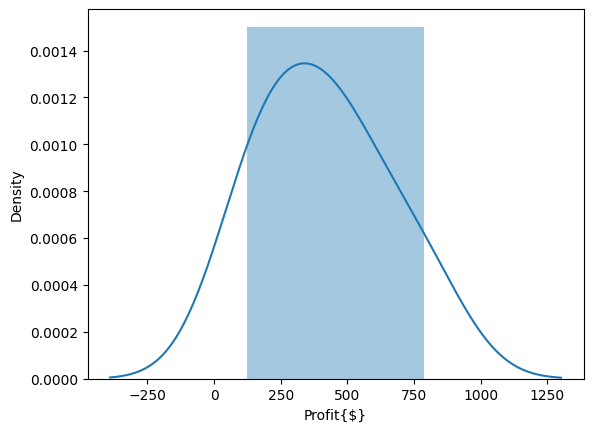

In [ ]:
#Distributionplot to identify which technique to use
sns.distplot(data['Profit{$}'])

In [ ]:
# as the curve is normally distributed in the middle so we use mean technique

In [ ]:
#data fill
col = data['Profit{$}']
col=col.fillna(col.mean(),inplace=True)

In [ ]:
data.isnull().sum()

Year         0
Profit{$}    0
dtype: int64

In [ ]:
data

,Year,Profit{$}
0,2001,123.0
1,2011,345.0
2,2021,567.0
3,2022,789.0
4,2023,410.5
5,2024,438.0
6,2025,410.5
7,2030,201.0


###Median Technique

In [ ]:
data1=pd.DataFrame({'Year':[2001,2011,2021,2022,2023,2024,2025,2030],
                   'Profit{$}':[78,np.nan,10,11,np.nan,10,np.nan,10]})

<ipython-input-145-e53a7c04cc28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Profit{$}'])


<Axes: xlabel='Profit{$}', ylabel='Density'>

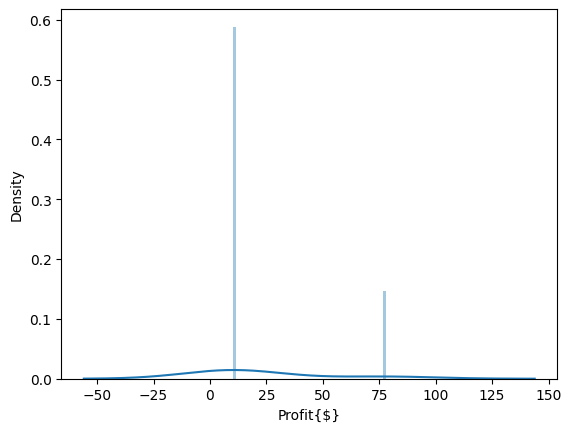

In [ ]:
#Distributionplot to identify which technique to use
sns.distplot(data1['Profit{$}'])

In [ ]:
#so as we can clearly see the curve is at the left side so we use median technique

In [ ]:
#data fill
col = data1['Profit{$}']
col=col.fillna(col.median(),inplace=True)

In [ ]:
data1

,Year,Profit{$}
0,2001,78.0
1,2011,10.0
2,2021,10.0
3,2022,11.0
4,2023,10.0
5,2024,10.0
6,2025,10.0
7,2030,10.0


#**Pandas Duplicate values**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#duplicates
data = pd.DataFrame({'team':['A','A','A','A','B','B','B','B'],
                     'points':[10,10,12,12,15,9,6,6],
                     'assists':[5,5,7,9,12,9,6,6]})
data

,team,points,assists
0,A,10,5
1,A,10,5
2,A,12,7
3,A,12,9
4,B,15,12
5,B,9,9
6,B,6,6
7,B,6,6


In [ ]:
team = data.duplicated(['team'])
print(team)
data[team]

0    False
1     True
2     True
3     True
4    False
5     True
6     True
7     True
dtype: bool


,team,points,assists
1,A,10,5
2,A,12,7
3,A,12,9
5,B,9,9
6,B,6,6
7,B,6,6


In [ ]:
duplicate = data.duplicated()
data[duplicate]

,team,points,assists
1,A,10,5
7,B,6,6


In [ ]:
duplicate = data.duplicated(['team','points'])
data[duplicate]

,team,points,assists
1,A,10,5
3,A,12,9
7,B,6,6


In [ ]:
#drop duplicates
data.drop_duplicates()

,team,points,assists
0,A,10,5
2,A,12,7
3,A,12,9
4,B,15,12
5,B,9,9
6,B,6,6


In [ ]:
data.drop_duplicates(['team'])

,team,points,assists
0,A,10,5
4,B,15,12


In [ ]:
data.drop_duplicates(['team','points'])

,team,points,assists
0,A,10,5
2,A,12,7
4,B,15,12
5,B,9,9
6,B,6,6


#**Handeling outliers**

In [ ]:
values=[1,2,3,4,5,6,7,8,10,12,55,60,70,80,400]

In [ ]:
values

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 55, 60, 70, 80, 400]

In [ ]:
#using IQR Method
Q1 = np.percentile(values,25)

In [ ]:
Q1

4.5

In [ ]:
Q3 = np.percentile(values,75)

In [ ]:
Q3

57.5

In [ ]:
IQR =Q3-Q1

In [ ]:
IQR

53.0

In [ ]:
low = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [ ]:
low , upper

(-75.0, 137.0)

In [ ]:
outliers=[]

In [ ]:
values

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 55, 60, 70, 80, 400]

In [ ]:
for i in values:
  if ((i>upper) or (i<low)):
    outliers.append(i)


In [ ]:
outliers

[400, 400]

In [ ]:
for i in values:
  if i not in outliers:
      print(i)

1
2
3
4
5
6
7
8
10
12
55
60
70
80


In [ ]:

values =[i for i in values if i not in outliers]

In [ ]:
values

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 55, 60, 70, 80]